# predicting-biodegradability-with-QSAR

### EDA

In [96]:
#importing libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv('biodegradable_a.csv')
df.head()

,SpMax_L,J_Dz(e),nHM,F01,F04,NssssC,nCb,C,nCp,nO,...,C_026,F02_CN,nHDon,SpMax_B,Psi_i_A,nN,SM6_B,nArCOOR,nX,Biodegradable
0,3.919,2.6909,0.0,0.0,0.0,0.0,0.0,31.4,2.0,0.0,...,0.0,0.0,0.0,2.949,1.591,0.0,7.253,0.0,0.0,RB
1,4.170,2.1144,0.0,0.0,0.0,0.0,0.0,30.8,1.0,1.0,...,0.0,0.0,0.0,3.315,1.967,0.0,7.257,0.0,0.0,RB
2,3.932,3.2512,0.0,0.0,0.0,0.0,0.0,26.7,2.0,4.0,...,0.0,0.0,1.0,NaN,2.417,0.0,7.601,0.0,0.0,RB
3,3.000,2.7098,0.0,0.0,0.0,0.0,0.0,20.0,NaN,2.0,...,0.0,0.0,1.0,NaN,5.000,0.0,6.690,0.0,0.0,RB
4,4.236,3.3944,0.0,0.0,0.0,0.0,0.0,29.4,2.0,4.0,...,0.0,0.0,0.0,3.351,2.405,0.0,8.003,0.0,NaN,RB


In [98]:
## Checking number of readily biodegradable (RB) vs non-readily biodegradable (NRB)
df.replace(['RB', 'NRB'], [0, 1], inplace=True)
vals, counts= np.unique(df["Biodegradable"], return_counts=True)
print("0 = RB, 1 = NRB")
for v, c in zip(vals, counts):
    print("# of ",v, "--->", c)

0 = RB, 1 = NRB
# of  0 ---> 3825
# of  1 ---> 739


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4564 entries, 0 to 4563
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SpMax_L        4564 non-null   float64
 1   J_Dz(e)        4564 non-null   float64
 2   nHM            4564 non-null   float64
 3   F01            4049 non-null   float64
 4   F04            4564 non-null   float64
 5   NssssC         4564 non-null   float64
 6   nCb            4564 non-null   float64
 7   C              3797 non-null   float64
 8   nCp            3893 non-null   float64
 9   nO             4564 non-null   float64
 10  F03            4564 non-null   float64
 11  SdssC          4564 non-null   float64
 12  HyWi_B         4085 non-null   float64
 13  LOC            4564 non-null   float64
 14  SM6_L          4564 non-null   float64
 15  F03_CO         4521 non-null   float64
 16  Me             4116 non-null   float64
 17  Mi             4564 non-null   float64
 18  nN_N    

In [100]:
pd.DataFrame(df.isna().sum()).transpose()

,SpMax_L,J_Dz(e),nHM,F01,F04,NssssC,nCb,C,nCp,nO,...,C_026,F02_CN,nHDon,SpMax_B,Psi_i_A,nN,SM6_B,nArCOOR,nX,Biodegradable
0,0,0,0,515,0,0,0,767,671,0,...,0,0,0,1358,460,0,0,0,682,0


In [101]:
#check for correlation
df_biodegradable_vars = df.loc[:,df.columns != 'Biodegradable']
df_biodegradable_y = df['Biodegradable']

df_biodegradable_corr = pd.concat([df_biodegradable_y, df_biodegradable_vars], axis=1)
corr = df_biodegradable_corr.corr()
corr_to_biodegradable = corr['Biodegradable'].sort_values(ascending=False)

In [102]:
print(corr_to_biodegradable.head(10))

Biodegradable    1.000000
nHM              0.466120
F02_CN           0.428333
C_026            0.427643
SM6_B            0.401354
F03              0.400053
B03              0.393854
nCb              0.390673
nN               0.390646
F04              0.384562
Name: Biodegradable, dtype: float64


In [103]:
df_biodegradable_vars.describe()

,SpMax_L,J_Dz(e),nHM,F01,F04,NssssC,nCb,C,nCp,nO,...,nCrt,C_026,F02_CN,nHDon,SpMax_B,Psi_i_A,nN,SM6_B,nArCOOR,nX
count,4564.000000,4564.000000,4564.000000,4049.000000,4564.000000,4564.000000,4564.000000,3797.000000,3893.000000,4564.000000,...,4306.000000,4564.000000,4564.000000,4564.000000,3206.000000,4104.000000,4564.000000,4564.000000,4564.000000,3882.000000
mean,4.553679,3.103605,0.180762,0.010373,0.264680,0.069676,0.886503,35.100603,1.225790,2.048642,...,0.031584,0.332603,0.415644,0.777388,3.594392,2.633800,0.267090,8.133804,0.091805,0.170273
std,0.480677,0.618921,0.775172,0.127266,1.219524,0.541474,1.429565,8.287902,1.333277,1.509354,...,0.323204,0.903048,1.296882,1.160364,0.588620,0.615330,0.683133,0.897383,0.415705,1.151995
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.267000,1.467000,0.000000,4.917000,0.000000,0.000000
25%,4.297888,2.736054,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,3.361406,2.188000,0.000000,7.700582,0.000000,0.000000
50%,4.579039,3.078901,0.000000,0.000000,0.000000,0.000000,0.000000,33.300000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,3.529299,2.565157,0.000000,8.090426,0.000000,0.000000
75%,4.869022,3.417500,0.000000,0.000000,0.000000,0.000000,2.000000,41.362696,2.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,3.732744,2.952000,0.000000,8.560427,0.000000,0.000000
max,6.496000,9.177500,12.000000,3.000000,36.000000,13.000000,18.000000,60.700000,24.000000,12.000000,...,8.000000,12.000000,18.000000,7.000000,10.428000,5.825000,8.000000,14.700000,4.000000,27.000000


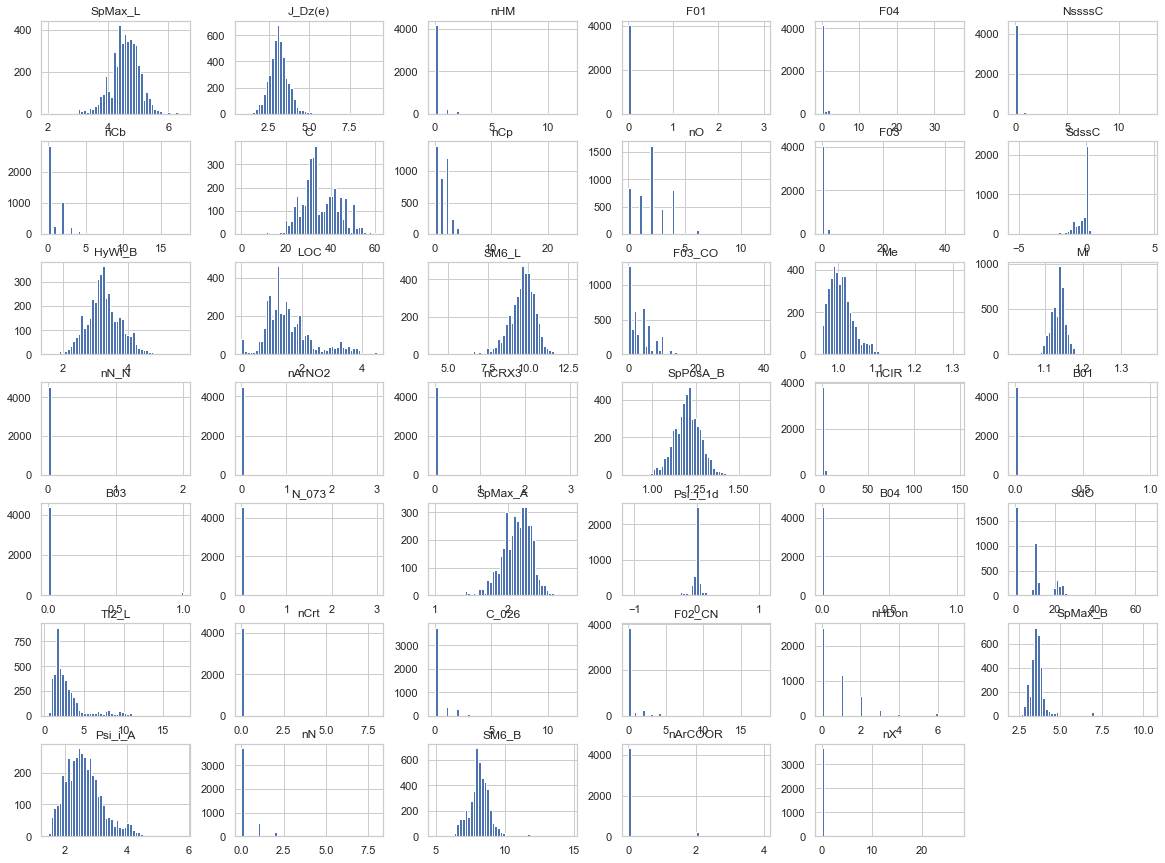

In [104]:
%matplotlib inline
df_biodegradable_vars.hist(bins=50, figsize=(20,15))
plt.show()

### Preprocessing the data:

In [105]:
#Dropping columns with more than significant amount of missing values 
df_biodegradable_vars.drop('SpMax_B', axis=1, inplace=True)
df_biodegradable_vars.drop('C', axis=1, inplace=True)
df_biodegradable_vars.drop('nCp', axis=1, inplace=True)

/Users/seangorman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [106]:
print(df_biodegradable_vars.isna().any(axis=1).sum())

2846


In [107]:
## Impute missing data and then normalise
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

trans_pipeline = Pipeline([
    ('simp_imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

features_transformed = trans_pipeline.fit_transform(df_biodegradable_vars)   #returns a transformed np array ready to be split

In [108]:
pd.DataFrame(features_transformed).head()
y = df_biodegradable_y.to_numpy()

In [109]:
print(pd.DataFrame(features_transformed).isna().any(axis=1).sum())

0


### Determining Feature Importances

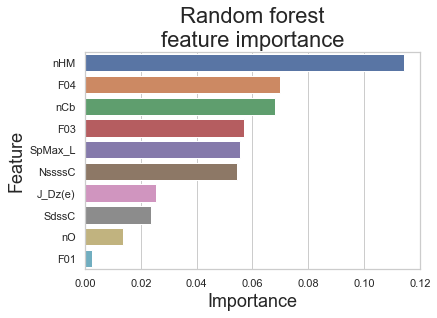

<Figure size 15000x12000 with 0 Axes>

In [110]:
import seaborn as sns
rfx=RandomForestClassifier()
rfx.fit(features_transformed, y)

# Calculate feature importance in random forest
importances = rfx.feature_importances_
labels = df_biodegradable_vars.columns
feature_df = pd.DataFrame(list(zip(labels, importances)), columns = ["feature","importance"]).head(10)
feature_df = feature_df.sort_values(by='importance', ascending=False,)

# image formatting
axis_fs = 18 #fontsize
title_fs = 22 #fontsize
sns.set(style="whitegrid")

ax = sns.barplot(x="importance", y="feature", data=feature_df)
ax.set_xlabel('Importance',fontsize = axis_fs) 
ax.set_ylabel('Feature', fontsize = axis_fs)#ylabel
ax.set_title('Random forest\nfeature importance', fontsize = title_fs)

plt.figure(figsize=(50, 40), dpi=300)
plt.tight_layout()
#plt.savefig("feature_importance.png",dpi=120) 
plt.show()



In [111]:
imortances = feature_df

### Splitting Data 

In [112]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import f1_score, confusion_matrix,matthews_corrcoef, precision_score, recall_score

# create a stratified shuffle split object with a test size of 0.25
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.25)
y = df_biodegradable_y.to_numpy()

# split the dataset into training and test sets
for train_index, test_index in stratified_split.split(features_transformed, y):
    X_train, X_test = features_transformed[train_index], features_transformed[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [113]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

def ClassStatistics(truth, preds):
    print(classification_report(truth, preds))
    print("MCC:", matthews_corrcoef(truth, preds))

### Training and optimizing models:

In [114]:
#XGBoost Classifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

params = {
    "learning_rate" : np.linspace(0.05, 0.4, 5),
    "max_depth" : [i for i in range(4, 20, 5)],
    "min_child_weight" : np.linspace(1, 8, 5),
    "gamma" : np.linspace(0.00, 0.4, 5),
    "n_estimators" : [i for i in range(5, 25, 5)],
    "colsample_bytree" : np.linspace(0.1, 0.8, 5),
}


boost = XGBClassifier()

random_search = RandomizedSearchCV(boost, param_distributions = params, n_iter = 5, scoring = "f1", cv = 5)

random_search.fit(X_train, y_train)

tuned_boost = random_search.best_estimator_     ## tuned XGBoost classifier 


In [115]:
#grid_search = GridSearchCV(boost, params, scoring = "roc_auc", cv = 5, verbose =3)
#grid_search.fit(X_train, y_train)
#grid_search.best_estimator_

In [116]:
#These were the parameters saved from the gridsearch. I copied them in to this cell to save us from running it again
#as the search took well over 15 minutes. 

#Added regularization (reg_alpha) to prevent overfitting 
gridtuned_boost = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.45000000000000007, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None, feature_types=None,
                              gamma=0.0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.3125, max_bin=256, max_cat_threshold=64,
                              max_cat_to_onehot=4, max_delta_step=0, max_depth=9, max_leaves=0,
                              min_child_weight=1.0, monotone_constraints='()',
                              n_estimators=20, n_jobs=0, num_parallel_tree=1, predictor='auto',
                              random_state=0,reg_alpha = 0.5)

gridtuned_boost.fit(X_train,y_train)
print()

In [117]:
##Random Forest Classifier

params = {
    "max_depth" : [i for i in range(4, 20, 5)],
    "n_estimators" : [i for i in range(5, 25, 5)],
}


rfc = RandomForestClassifier()

random_search = RandomizedSearchCV(rfc, param_distributions = params, n_iter = 5, scoring = "f1", cv = 5)
random_search.fit(X_train, y_train)

tuned_rfc = random_search.best_estimator_

In [118]:
mdl_list = [tuned_boost, gridtuned_boost, tuned_rfc]
name = ["RS_XGBoost", "GS_XGBoost", "Random_Forest"]
idx=0

for i in mdl_list:
    scores = cross_val_score(i, X_train, y_train)
    print(name[idx] + ": " + str(np.mean(scores)))
    idx += 1

RS_XGBoost: 0.9684479446792164
GS_XGBoost: 0.9658193537371409
Random_Forest: 0.96552780979212


### Selecting Model & Evaluating Performance

In [123]:
#Raandom Forst was ultimately selected
preds = tuned_rfc.predict(X_test)

In [124]:
#Present Final Stats
final_stats = classification_report(y_test, preds, output_dict=True)
final_stats = pd.DataFrame(final_stats)
final_stats.columns = ['RB', 'NRB', 'accuracy', 'macro avg', 'weighted avg']
final_stats = final_stats.T

In [125]:
#Transpose the dataframe conf
final_stats

,precision,recall,f1-score,support
RB,0.972079,0.983264,0.977639,956.000000
NRB,0.908046,0.854054,0.880223,185.000000
accuracy,0.962314,0.962314,0.962314,0.962314
macro avg,0.940062,0.918659,0.928931,1141.000000
weighted avg,0.961696,0.962314,0.961844,1141.000000


In [126]:
final_MCC = "MCC: {}".format(matthews_corrcoef(y_test, preds))

In [127]:
final_MCC

'MCC: 0.8584543314918028'